<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.2/blob/main/Survey_Data_Analysis_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME

##Analysis of Survey Data for POS
##Iteration 2
##Using R

#### Renaming it from:
#### Separate_NorthSouth_Data_v12.ipynb
#### to
#### Survey Data Analysis v01.ipnyb

This file takes in "Extract of Daily POS Data" in excel format and outputs two files, one for North and other for South region

#History

v1: First Iteration

v2: First run of North and South completed

v3: Changed write xlsx to incoporate multiple sheets. Added System Date to Output File Name

v4: Adding create "survey summary" section from "Survey-Summary" colab 

v5: Continuation of v4. Fixing Special characters in Col Names

v6: Continuation of v5. Restructured Code

v7: Fixing Col Names for Without POS

v8: Adding Basic Graphs

v9: Automate UniVariate Analysis using PURRR

v10: Continuation of v9

v11: Continuation of v10. Moving from count to proportions

v12: Continuation of v11

-------------------------------
Renamed as: Survey Data Analysis 01. ipnyb
-------------------------------

v01: No change

v02: Removed code writing output/sample data

v03: Fixing the TODO part for Uni-Var analysis

v04: Pended the TODO part, replicating the Uni-Var analysis done so far on Without POS, on With POS data

Clean data has been dumped in CSV at end of v03, use it to generate it again, if required.

This file replaces the analysis on With POS, instead of copy-pasting to reduce the file size

v05: Loading the data cleaned in v03 and v04, removing all the cleanup code

v06: setting the order of factor levels for better plots

v07: Reading in the ordered factor data, cleaned up in v06

However the problem was openxlsx package does not allow to specify the col types, and factors were being read in as character

Solved by mutate_if for all character vectors

v08: Continuing the cleaning, with multiple-response now

v09: Cleaned up till ORG_CURRENT_PAYMENT_OPTIONS


(still TODO) Dumping Multi-Response 'Customer Data' as a seperate sheet in output

v10: Cleaned up till 
ORG_URDU_FEATURES_EXPECTED


## Setup

In [101]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

In [102]:
# conditional install - Janitor
list.of.packages <- c("janitor")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(janitor)

Library to read in XLSX Data

OpenXLSX (Good, works)

In [103]:
# conditional install - openxlsx

list.of.packages <- c("openxlsx")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(openxlsx)

In [104]:
# explore later
# https://slcladal.github.io/surveys.html

# install libraries
#install.packages(c("knitr", "lattice", "tidyverse", "likert", 
#                   "MASS", "psych", "viridis", "ggplot2", 
#                   "userfriendlyscience"))

Explore later:
http://gdfe.co/srvyr/articles/srvyr-vs-survey.html

In [105]:
#install.packages('devtools')


list.of.packages <- c("devtools")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(devtools)

For Multi-Response Analysis

https://github.com/dgrtwo/stacksurveyr

# Setting Input Files

In [106]:
## With POS File

with_pos_file = '/content/SurveyData-withPOS-2021-05-11_08_54.xlsx'

In [107]:
## Without POS File

#input_file_2 = '/content/Without - Survey Summary Report_ 20201113.xlsx'
#without_pos_file = '/content/SurveyData-withoutPOS-2021May10.xlsx'

# Input Data

In [108]:
# reading in input File

df_with = read_xlsx(with_pos_file, sheet=1)

#df_without = read_xlsx(without_pos_file, sheet=1)

In [109]:
# printing DF
print(as_tibble(df_with))

# A tibble: 1,210 x 24
   ORG_CITY  ORG_POS_BUSINES… ORG_INTERNET_AC… ORG_EXPAND_BUSI… ORG_DELIVERY_SE…
   <chr>     <chr>            <chr>            <chr>            <chr>           
 1 Rawalpin… Yes              None             No               No              
 2 Islamabad Yes              Mobile           Y:short-term     Thinking about …
 3 Islamabad Yes              Mobile           Y:immediately    Yes             
 4 Islamabad Yes              None             Y:long-term      No              
 5 Islamabad Yes              Mobile           Y:immediately    No              
 6 Islamabad Yes              Mobile           Y:immediately    No              
 7 Islamabad Yes              Mobile           Y:long-term      No              
 8 Islamabad Yes              Mobile           Y:long-term      No              
 9 Islamabad Yes              Dedicated        No               No              
10 Islamabad Yes              Dedicated        Y:immediately    Yes             
# … w

In [110]:
## inspect the data
str(df_with)

tibble[,24] [1,210 × 24] (S3: tbl_df/tbl/data.frame)
 $ ORG_CITY                      : chr [1:1210] "Rawalpindi" "Islamabad" "Islamabad" "Islamabad" ...
 $ ORG_POS_BUSINESS_IMPROVEMENT  : chr [1:1210] "Yes" "Yes" "Yes" "Yes" ...
 $ ORG_INTERNET_ACCESS           : chr [1:1210] "None" "Mobile" "Mobile" "None" ...
 $ ORG_EXPAND_BUSINESS           : chr [1:1210] "No" "Y:short-term" "Y:immediately" "Y:long-term" ...
 $ ORG_DELIVERY_SERVICE          : chr [1:1210] "No" "Thinking about it" "Yes" "No" ...
 $ ORG_CUSTOMER_DATA             : chr [1:1210] "Do not Store" "Do not Store, Use for discounts (repeated purchases)" "Use for discounts (repeated purchases)" "Use for delivery (sending ordered items), Use for discounts (repeated purchases)" ...
 $ ORG_EMP_COUNT                 : chr [1:1210] "2" "3" "2" "1" ...
 $ ORG_INTERNET_DISRUPTION       : chr [1:1210] "Never" "Little" "Never" "Never" ...
 $ ORG_NEW_POS_PAYMENT_PREF      : chr [1:1210] "One-Time" "Recurring:12M" "Recurring:1M" "Recurr

Remove non-useful columns


In [111]:
# remove non-useful columns
df_with %>% select(!starts_with("SB")) -> df_with_1

#df_with_1 %>% select(!c(date, ORG_PICTURE_LINK,ORG_VISITING_CARD, RESP_NAME , RESP_PHONE )) -> df_with_1



Converting all character to factors

In [112]:
df_with_2 <- df_with_1 %>% mutate_if(is.character,as.factor)

In [113]:
df_with_2 %>% glimpse()

Rows: 1,210
Columns: 24
$ ORG_CITY                       <fct> Rawalpindi, Islamabad, Islamabad, Islam…
$ ORG_POS_BUSINESS_IMPROVEMENT   <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes,…
$ ORG_INTERNET_ACCESS            <fct> None, Mobile, Mobile, None, Mobile, Mob…
$ ORG_EXPAND_BUSINESS            <fct> No, Y:short-term, Y:immediately, Y:long…
$ ORG_DELIVERY_SERVICE           <fct> No, Thinking about it, Yes, No, No, No,…
$ ORG_CUSTOMER_DATA              <fct> "Do not Store", "Do not Store, Use for …
$ ORG_EMP_COUNT                  <fct> 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, …
$ ORG_INTERNET_DISRUPTION        <fct> Never, Little, Never, Never, Little, Li…
$ ORG_NEW_POS_PAYMENT_PREF       <fct> One-Time, Recurring:12M, Recurring:1M, …
$ ORG_NEW_POS_LANG_PREF          <fct> English and Urdu, English and Urdu, Eng…
$ ORG_OUTLETS_COUNT              <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, …
$ ORG_NEW_POS_KIND               <fct> Stand-Alone, Stand-Alone, Web-Based, St…
$ ORG_WILLINGNES

## Multiple Choice Answers

Fancy Frequency Tables

https://cran.r-project.org/web/packages/janitor/vignettes/tabyls.html

Collapsing Categories or Values

https://r4ds.had.co.nz/factors.html

1. Fixing Garbage Values

##### 1.1. ORG_POS_BUSINESS_IMPROVEMENT

Fixed Previosuly - Nothing to be done here

In [114]:
df_with_2 %>% tabyl(ORG_POS_BUSINESS_IMPROVEMENT)

ORG_POS_BUSINESS_IMPROVEMENT,n,percent
<fct>,<dbl>,<dbl>
No,843,0.6966942
Yes,367,0.3033058


##### 1.2  ORG_INTERNET_ACCESS

Fixed - Nothing to be done here

In [115]:
tabyl(df_with_2$ORG_INTERNET_ACCESS)

df_with_2$ORG_INTERNET_ACCESS,n,percent
<fct>,<dbl>,<dbl>
Dedicated,267,0.2206612
Mobile,594,0.4909091
None,349,0.2884298


Reordering the factor levels

In [116]:
levels(df_with_2$ORG_INTERNET_ACCESS)

[1] "Dedicated" "Mobile"    "None"

In [117]:
df_with_2 <- df_with_2 %>%
mutate(ORG_INTERNET_ACCESS = 
fct_relevel(ORG_INTERNET_ACCESS, c('None','Mobile','Dedicated')))

In [118]:
tabyl(df_with_2$ORG_INTERNET_ACCESS)

df_with_2$ORG_INTERNET_ACCESS,n,percent
<fct>,<dbl>,<dbl>
None,349,0.2884298
Mobile,594,0.4909091
Dedicated,267,0.2206612


##### 1.3 ORG_EXPAND_BUSINESS  

Fixed - Nothing to be done here

In [119]:
tabyl(df_with_2$ORG_EXPAND_BUSINESS)

df_with_2$ORG_EXPAND_BUSINESS,n,percent
<fct>,<dbl>,<dbl>
No,655,0.54132231
Y:immediately,218,0.18016529
Y:long-term,290,0.23966942
Y:short-term,47,0.03884298


In [120]:
levels(df_with_2$ORG_EXPAND_BUSINESS)

[1] "No"            "Y:immediately" "Y:long-term"   "Y:short-term"

fct_relevel(.f, ..., afer = 0L)
Manually reorder factor levels.
fct_relevel(f, c("b", "c", "a")) 

In [121]:
df_with_2  <- df_with_2 %>%
mutate (ORG_EXPAND_BUSINESS = fct_relevel(ORG_EXPAND_BUSINESS, 
c('No','Y:immediately','Y:short-term','Y:long-term')))

In [122]:
tabyl(df_with_2$ORG_EXPAND_BUSINESS)

df_with_2$ORG_EXPAND_BUSINESS,n,percent
<fct>,<dbl>,<dbl>
No,655,0.54132231
Y:immediately,218,0.18016529
Y:short-term,47,0.03884298
Y:long-term,290,0.23966942


##### 1.4 ORG_DELIVERY_SERVICE  

Fixed, Nothing to be Done

In [123]:
tabyl(df_with_2$ORG_DELIVERY_SERVICE)

df_with_2$ORG_DELIVERY_SERVICE,n,percent
<fct>,<dbl>,<dbl>
No,986,0.81487603
Thinking about it,110,0.09090909
Yes,114,0.09421488


##### 1.5 ORG_CUSTOMER_DATA

In [124]:
#df_with_1 <- df_with

In [125]:
tabyl(df_with_2$ORG_CUSTOMER_DATA)

df_with_2$ORG_CUSTOMER_DATA,n,percent
<fct>,<dbl>,<dbl>
-,4,0.0033057851
Do not Store,370,0.3057851240
"Do not Store, Store but do not use",2,0.0016528926
"Do not Store, Use for delivery (sending ordered items)",1,0.0008264463
"Do not Store, Use for discounts (repeated purchases)",341,0.2818181818
"Do not Store, Use for discounts (repeated purchases), Use for sending SMS (advertisement)",2,0.0016528926
"Do not Store, Use for sending SMS (advertisement)",1,0.0008264463
Store but do not use,121,0.1000000000
"Store but do not use, Use for delivery (sending ordered items), Use for discounts (repeated purchases)",2,0.0016528926


, is being used as a delimiter for multi-responses and also is included in this response string 'Store, but do not use'

1. Replace 'Store, but do not use' to 'Store but do not use' (the comma is removed)

2. Replace , as a seperator to ;

In [126]:
df_with_2 <- df_with_2 %>% 
  mutate(ORG_CUSTOMER_DATA = str_replace(ORG_CUSTOMER_DATA, "Store, but do not use", "Store but do not use")) #%>%
  #tabyl(ORG_CUSTOMER_DATA)

In [127]:
tabyl(df_with_1$ORG_CUSTOMER_DATA)

df_with_1$ORG_CUSTOMER_DATA,n,percent
<chr>,<dbl>,<dbl>
-,4,0.0033057851
Do not Store,370,0.3057851240
"Do not Store, Store but do not use",2,0.0016528926
"Do not Store, Use for delivery (sending ordered items)",1,0.0008264463
"Do not Store, Use for discounts (repeated purchases)",341,0.2818181818
"Do not Store, Use for discounts (repeated purchases), Use for sending SMS (advertisement)",2,0.0016528926
"Do not Store, Use for sending SMS (advertisement)",1,0.0008264463
Store but do not use,121,0.1000000000
"Store but do not use, Use for delivery (sending ordered items), Use for discounts (repeated purchases)",2,0.0016528926


Generating a row-id for each row

Ref: https://bookdown.org/yih_huynh/Guide-to-R-Book/row-number.html

In [128]:
df_with_2 <- df_with_2 %>% mutate(RESP_ID = row_number())

In [129]:
df_with_2 %>% glimpse()

Rows: 1,210
Columns: 25
$ ORG_CITY                       <fct> Rawalpindi, Islamabad, Islamabad, Islam…
$ ORG_POS_BUSINESS_IMPROVEMENT   <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes,…
$ ORG_INTERNET_ACCESS            <fct> None, Mobile, Mobile, None, Mobile, Mob…
$ ORG_EXPAND_BUSINESS            <fct> No, Y:short-term, Y:immediately, Y:long…
$ ORG_DELIVERY_SERVICE           <fct> No, Thinking about it, Yes, No, No, No,…
$ ORG_CUSTOMER_DATA              <chr> "Do not Store", "Do not Store, Use for …
$ ORG_EMP_COUNT                  <fct> 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, …
$ ORG_INTERNET_DISRUPTION        <fct> Never, Little, Never, Never, Little, Li…
$ ORG_NEW_POS_PAYMENT_PREF       <fct> One-Time, Recurring:12M, Recurring:1M, …
$ ORG_NEW_POS_LANG_PREF          <fct> English and Urdu, English and Urdu, Eng…
$ ORG_OUTLETS_COUNT              <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, …
$ ORG_NEW_POS_KIND               <fct> Stand-Alone, Stand-Alone, Web-Based, St…
$ ORG_WILLINGNES

https://mgimond.github.io/ES218/Week03b.html

https://stackoverflow.com/questions/45696738/tallying-multiple-choice-entries-in-a-single-column-in-a-r-dataframe-programmati

In [130]:
levels(df_with_2$ORG_CUSTOMER_DATA)

NULL

In [131]:
df_with_2$ORG_CUSTOMER_DATA %>% 
factor() %>% 
fct_inorder() -> df_with_2$ORG_CUSTOMER_DATA

In [132]:
levels(df_with_2$ORG_CUSTOMER_DATA)

[1] "Do not Store"                                                                                                         
 [2] "Do not Store, Use for discounts (repeated purchases)"                                                                 
 [3] "Use for discounts (repeated purchases)"                                                                               
 [4] "Use for delivery (sending ordered items), Use for discounts (repeated purchases)"                                     
 [5] "Use for discounts (repeated purchases), Use for sending SMS (advertisement)"                                          
 [6] "Store but do not use"                                                                                                 
 [7] "Use for sending SMS (advertisement)"                                                                                  
 [8] "Store but do not use, Use for discounts (repeated purchases)"                                                         
 [9] "Do not Store, Use for delivery (sending ordered items)"                                                               
[10] "-"                                                                                                                    
[11] "Do not Store, Use for discounts (repeated purchases), Use for sending SMS (advertisement)"                            
[12] "Store but do not use, Use for delivery (sending ordered items), Use for discounts (repeated purchases)"               
[13] "Do not Store, Use for sending SMS (advertisement)"                                                                    
[14] "Do not Store, Store but do not use"                                                                                   
[15] "Use for delivery (sending ordered items)"                                                                             
[16] "Use for delivery (sending ordered items), Use for discounts (repeated purchases), Use for sending SMS (advertisement)"
[17] "Use for delivery (sending ordered items), Use for sending SMS (advertisement)"                                        
[18] "Store but do not use, Use for discounts (repeated purchases), Use for sending SMS (advertisement)"                    
[19] "Store but do not use, Use for sending SMS (advertisement)"

In [133]:
df_with_2 %>%
    dplyr::select(RESP_ID, ORG_CUSTOMER_DATA)

RESP_ID,ORG_CUSTOMER_DATA
<int>,<fct>
1,Do not Store
2,"Do not Store, Use for discounts (repeated purchases)"
3,Use for discounts (repeated purchases)
4,"Use for delivery (sending ordered items), Use for discounts (repeated purchases)"
5,"Use for delivery (sending ordered items), Use for discounts (repeated purchases)"
6,Use for discounts (repeated purchases)
7,Do not Store
8,"Do not Store, Use for discounts (repeated purchases)"
9,"Do not Store, Use for discounts (repeated purchases)"


In [134]:
df_with_2 %>%
    dplyr::select(RESP_ID, ORG_CUSTOMER_DATA) %>%
    tidyr::gather(ORG_CUSTOMER_DATA, answer, -RESP_ID) %>%
    dplyr::filter(!is.na(answer)) %>%
    tidyr::unnest(answer = stringr::str_split(answer, ", ")) -> df_customer_data


Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


In [135]:
df_customer_data %>% glimpse()

Rows: 1,693
Columns: 3
$ RESP_ID           <int> 1, 2, 2, 3, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 11…
$ ORG_CUSTOMER_DATA <chr> "ORG_CUSTOMER_DATA", "ORG_CUSTOMER_DATA", "ORG_CUSTO…
$ answer            <chr> "Do not Store", "Do not Store", "Use for discounts (…


In [136]:
tabyl(df_customer_data$answer)

df_customer_data$answer,n,percent
<chr>,<dbl>,<dbl>
-,4,0.00236267
Do not Store,717,0.42350856
Store but do not use,176,0.10395747
Use for delivery (sending ordered items),51,0.03012404
Use for discounts (repeated purchases),692,0.40874188
Use for sending SMS (advertisement),53,0.03130538


Converting from CHR to FACTOR

In [137]:
df_customer_data$answer %>% 
factor() %>% 
fct_inorder() -> df_customer_data$answer

In [138]:
tabyl(df_customer_data$answer)

df_customer_data$answer,n,percent
<fct>,<dbl>,<dbl>
Do not Store,717,0.42350856
Use for discounts (repeated purchases),692,0.40874188
Use for delivery (sending ordered items),51,0.03012404
Use for sending SMS (advertisement),53,0.03130538
Store but do not use,176,0.10395747
-,4,0.00236267


Replace - with No Answer

In [139]:
levels(df_customer_data$answer)

[1] "Do not Store"                            
[2] "Use for discounts (repeated purchases)"  
[3] "Use for delivery (sending ordered items)"
[4] "Use for sending SMS (advertisement)"     
[5] "Store but do not use"                    
[6] "-"

In [140]:
df_customer_data <- df_customer_data %>% 
   mutate (answer = fct_recode(df_customer_data$answer, 
   'No ANS' = '-'))

In [141]:
levels(df_customer_data$answer)

[1] "Do not Store"                            
[2] "Use for discounts (repeated purchases)"  
[3] "Use for delivery (sending ordered items)"
[4] "Use for sending SMS (advertisement)"     
[5] "Store but do not use"                    
[6] "No ANS"

In [142]:
df_customer_data %>% glimpse()

Rows: 1,693
Columns: 3
$ RESP_ID           <int> 1, 2, 2, 3, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 11…
$ ORG_CUSTOMER_DATA <chr> "ORG_CUSTOMER_DATA", "ORG_CUSTOMER_DATA", "ORG_CUSTO…
$ answer            <fct> Do not Store, Do not Store, Use for discounts (repea…


##### 1.6 ORG_EMP_COUNT  

In [144]:
#df_with_1 = df_with

In [145]:
df_with_2 %>% tabyl(ORG_EMP_COUNT)

ORG_EMP_COUNT,n,percent
<fct>,<dbl>,<dbl>
1,465,0.3842975207
10,3,0.0024793388
10+,2,0.0016528926
2,242,0.2000000000
3,231,0.1909090909
4,145,0.1198347107
5,93,0.0768595041
6,24,0.0198347107
7,3,0.0024793388


reordering levels

In [146]:
levels(df_with_2$ORG_EMP_COUNT)

[1] "1"   "10"  "10+" "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"

In [147]:
df_with_2 <- df_with_2 %>% 
   mutate (ORG_EMP_COUNT = fct_relevel(ORG_EMP_COUNT, 
   levels=c('1','2','3','4','5','6','7','8','9','10','10+')))

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [148]:
tabyl(df_with_2$ORG_EMP_COUNT)

df_with_2$ORG_EMP_COUNT,n,percent
<fct>,<dbl>,<dbl>
1,465,0.3842975207
2,242,0.2000000000
3,231,0.1909090909
4,145,0.1198347107
5,93,0.0768595041
6,24,0.0198347107
7,3,0.0024793388
8,1,0.0008264463
9,1,0.0008264463


##### 1.7 ORG_INTERNET_DISRUPTION

In [149]:
df_with_2 %>% tabyl (ORG_INTERNET_DISRUPTION)

ORG_INTERNET_DISRUPTION,n,percent
<fct>,<dbl>,<dbl>
A lot,20,0.016528926
Little,136,0.112396694
Never,701,0.579338843
No Internet,9,0.007438017
Sometimes,344,0.284297521


In [150]:
levels(df_with_2$ORG_INTERNET_DISRUPTION)

[1] "A lot"       "Little"      "Never"       "No Internet" "Sometimes"

reordering levels

In [151]:
df_with_2 <- df_with_2 %>%
  mutate(ORG_INTERNET_DISRUPTION = fct_relevel(ORG_INTERNET_DISRUPTION, 
  levels = c('No Internet','Little','Sometimes','A lot','Never')))

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [152]:
tabyl(df_with_2$ORG_INTERNET_DISRUPTION)

df_with_2$ORG_INTERNET_DISRUPTION,n,percent
<fct>,<dbl>,<dbl>
No Internet,9,0.007438017
Little,136,0.112396694
Sometimes,344,0.284297521
A lot,20,0.016528926
Never,701,0.579338843


##### 1.8 ORG_NEW_POS_PAYMENT_PREF

In [154]:
#df_with_1 <- df_with

In [155]:
tabyl(df_with_2$ORG_NEW_POS_PAYMENT_PREF)

df_with_2$ORG_NEW_POS_PAYMENT_PREF,n,percent
<fct>,<dbl>,<dbl>
No ANS,119,0.09834711
One-Time,528,0.43636364
Recurring:12M,442,0.36528926
Recurring:1M,38,0.03140496
Recurring:3M,27,0.02231405
Recurring:6M,56,0.04628099


In [156]:
levels(df_with_2$ORG_NEW_POS_PAYMENT_PREF)

[1] "No ANS"        "One-Time"      "Recurring:12M" "Recurring:1M" 
[5] "Recurring:3M"  "Recurring:6M"

In [157]:
df_with_2 <- df_with_2 %>%
mutate (ORG_NEW_POS_PAYMENT_PREF = fct_relevel(ORG_NEW_POS_PAYMENT_PREF,
levels=c('No ANS',
'One-Time',
'Recurring:1M',
'Recurring:3M',
'Recurring:6M',
'Recurring:12M'
))) 

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [158]:
tabyl(df_with_2$ORG_NEW_POS_PAYMENT_PREF)

df_with_2$ORG_NEW_POS_PAYMENT_PREF,n,percent
<fct>,<dbl>,<dbl>
No ANS,119,0.09834711
One-Time,528,0.43636364
Recurring:1M,38,0.03140496
Recurring:3M,27,0.02231405
Recurring:6M,56,0.04628099
Recurring:12M,442,0.36528926


##### 1.9 ORG_NEW_POS_LANG_PREF

In [159]:
tabyl(df_with_2$ORG_NEW_POS_LANG_PREF)

df_with_2$ORG_NEW_POS_LANG_PREF,n,percent
<fct>,<dbl>,<dbl>
English,488,0.4033058
English and Urdu,722,0.5966942


In [160]:
levels(df_with_2$ORG_NEW_POS_LANG_PREF)

[1] "English"          "English and Urdu"

##### 1.10 ORG_OUTLETS_COUNT

In [161]:
tabyl(df_with_2$ORG_OUTLETS_COUNT)

df_with_2$ORG_OUTLETS_COUNT,n,percent
<fct>,<dbl>,<dbl>
1,994,0.821487603
10+,4,0.003305785
2,54,0.044628099
3,69,0.057024793
4,50,0.041322314
5,36,0.029752066
6 to 10,3,0.002479339


In [162]:
levels(df_with_2$ORG_OUTLETS_COUNT)

[1] "1"       "10+"     "2"       "3"       "4"       "5"       "6 to 10"

reorder the levels

In [163]:
df_with_2 <- df_with_2 %>% 
   mutate (ORG_OUTLETS_COUNT = fct_relevel(ORG_OUTLETS_COUNT, 
   levels=c('1','2','3','4','5','6 to 10','10+')))

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [164]:
tabyl(df_with_2$ORG_OUTLETS_COUNT)

df_with_2$ORG_OUTLETS_COUNT,n,percent
<fct>,<dbl>,<dbl>
1,994,0.821487603
2,54,0.044628099
3,69,0.057024793
4,50,0.041322314
5,36,0.029752066
6 to 10,3,0.002479339
10+,4,0.003305785


##### 1.11 ORG_NEW_POS_KIND

In [165]:
tabyl(df_with_2$ORG_NEW_POS_KIND)

df_with_2$ORG_NEW_POS_KIND,n,percent
<fct>,<dbl>,<dbl>
Stand-Alone,549,0.453719
Web-Based,661,0.546281


##### 1.12 ORG_WILLINGNESS_TO_PAY_AMOUNT

In [166]:
tabyl(df_with_2$ORG_WILLINGNESS_TO_PAY_AMOUNT)

df_with_2$ORG_WILLINGNESS_TO_PAY_AMOUNT,n,percent
<fct>,<dbl>,<dbl>
<1K,30,0.024793388
0,53,0.043801653
10K,30,0.024793388
10K+,38,0.031404959
1K,126,0.104132231
2K,155,0.128099174
3K,61,0.050413223
4K,30,0.024793388
5K,56,0.046280992


In [167]:
levels(df_with_2$ORG_WILLINGNESS_TO_PAY_AMOUNT)

[1] "<1K"    "0"      "10K"    "10K+"   "1K"     "2K"     "3K"     "4K"    
 [9] "5K"     "6K"     "7K"     "8K"     "9K"     "No ANS"

Reordering the levels

In [168]:
df_with_2 <- 
    df_with_2 %>%
        mutate (ORG_WILLINGNESS_TO_PAY_AMOUNT = fct_relevel(ORG_WILLINGNESS_TO_PAY_AMOUNT,
        levels=c(
          'No ANS',
          '0',
          '<1K',
          '1K',
          '2K',
          '3K',
          '4K',
          '5K',
          '6K',
          '7K',
          '8K',
          '9K',
          '10K',
          '10K+'))) 

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [169]:
tabyl(df_with_2$ORG_WILLINGNESS_TO_PAY_AMOUNT)

df_with_2$ORG_WILLINGNESS_TO_PAY_AMOUNT,n,percent
<fct>,<dbl>,<dbl>
No ANS,574,0.474380165
0,53,0.043801653
<1K,30,0.024793388
1K,126,0.104132231
2K,155,0.128099174
3K,61,0.050413223
4K,30,0.024793388
5K,56,0.046280992
6K,22,0.018181818


##### 1.13 ORG_NEW_POS_DEVICES

In [170]:
tabyl(df_with_2$ORG_NEW_POS_DEVICES)

df_with_2$ORG_NEW_POS_DEVICES,n,percent
<fct>,<dbl>,<dbl>
-,12,0.0099173554
Laptop,16,0.0132231405
"Laptop, Mobile Phone",4,0.0033057851
"Laptop, Mobile Phone, PC",5,0.0041322314
"Laptop, Mobile Phone, PC, POS company hardware",1,0.0008264463
"Laptop, Mobile Phone, PC, POS company hardware, Tablet",62,0.0512396694
"Laptop, Mobile Phone, PC, Tablet",16,0.0132231405
"Laptop, Mobile Phone, POS company hardware",1,0.0008264463
"Laptop, Mobile Phone, POS company hardware, Tablet",3,0.0024793388


Multiple Response - here

In [171]:
df_with_2 %>%
    dplyr::select(RESP_ID, ORG_NEW_POS_DEVICES) %>%
    tidyr::gather(ORG_NEW_POS_DEVICES, answer, -RESP_ID) %>%
    dplyr::filter(!is.na(answer)) %>%
    tidyr::unnest(answer = stringr::str_split(answer, ", ")) -> df_new_pos_devices

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


In [172]:
tabyl(df_new_pos_devices$answer)

df_new_pos_devices$answer,n,percent
<chr>,<dbl>,<dbl>
-,12,0.005961252
Laptop,233,0.115747640
Mobile Phone,301,0.149528068
PC,290,0.144063587
POS company hardware,332,0.164927968
Tablet,845,0.419771485


Converting from CHR to FACTOR

In [173]:
df_new_pos_devices$answer %>% 
factor() %>% 
fct_inorder() -> df_new_pos_devices$answer

In [174]:
tabyl(df_new_pos_devices$answer)

df_new_pos_devices$answer,n,percent
<fct>,<dbl>,<dbl>
Mobile Phone,301,0.149528068
PC,290,0.144063587
Laptop,233,0.115747640
Tablet,845,0.419771485
POS company hardware,332,0.164927968
-,12,0.005961252


In [175]:
df_new_pos_devices <- df_new_pos_devices %>% 
   mutate (answer = fct_recode(df_new_pos_devices$answer, 
   'No ANS' = '-'))

In [176]:
tabyl(df_new_pos_devices$answer)

df_new_pos_devices$answer,n,percent
<fct>,<dbl>,<dbl>
Mobile Phone,301,0.149528068
PC,290,0.144063587
Laptop,233,0.115747640
Tablet,845,0.419771485
POS company hardware,332,0.164927968
No ANS,12,0.005961252


##### 1.14 ORG_CURRENT_PAYMENT_OPTIONS

In [100]:
#df_with_2 <- df_with_1

In [177]:
tabyl(df_with_2$ORG_CURRENT_PAYMENT_OPTIONS)

df_with_2$ORG_CURRENT_PAYMENT_OPTIONS,n,percent
<fct>,<dbl>,<dbl>
-,2,0.0016528926
Cash,1141,0.9429752066
"Cash (-), NayaPay (-), Other (Please Specify) (-), QR code (-)",1,0.0008264463
"Cash, Credit/Debit Cards",25,0.0206611570
"Cash, Credit/Debit Cards, Easy-Paisa",3,0.0024793388
"Cash, Credit/Debit Cards, Easy-Paisa, Jazz-Cash",2,0.0016528926
"Cash, Credit/Debit Cards, Easy-Paisa, Jazz-Cash, QR code",1,0.0008264463
"Cash, Credit/Debit Cards, Jazz-Cash",1,0.0008264463
"Cash, Easy-Paisa",11,0.0090909091


Replace the garbage rows

In [95]:

#str_replace_all(df_with_2$ORG_CURRENT_PAYMENT_OPTIONS,
#     "\\(-\\)", "")

[1] "Cash"                                                    
   [2] "Cash"                                                    
   [3] "Cash"                                                    
   [4] "Cash"                                                    
   [5] "Cash"                                                    
   [6] "Cash"                                                    
   [7] "Cash"                                                    
   [8] "Cash"                                                    
   [9] "Cash, Easy-Paisa, Jazz-Cash"                             
  [10] "Cash"                                                    
  [11] "Cash"                                                    
  [12] "Cash"                                                    
  [13] "Cash, Credit/Debit Cards, Easy-Paisa"                    
  [14] "Cash, Easy-Paisa"                                        
  [15] "Cash"                                                    
  [16] "Cash"                                                    
  [17] "Cash"                                                    
  [18] "Cash, Easy-Paisa"                                        
  [19] "Cash"                                                    
  [20] "Cash"                                                    
  [21] "Cash"                                                    
  [22] "Cash, Credit/Debit Cards"                                
  [23] "Cash"                                                    
  [24] "Cash"                                                    
  [25] "Cash, Credit/Debit Cards, Easy-Paisa, Jazz-Cash, QR code"
  [26] "Cash"                                                    
  [27] "Cash, Credit/Debit Cards"                                
  [28] "Cash, NayaPay"                                           
  [29] "Cash"                                                    
  [30] "Cash"                                                    
  [31] "Cash"                                                    
  [32] "Cash"                                                    
  [33] "Cash"                                                    
  [34] "Cash"                                                    
  [35] "Cash"                                                    
  [36] "Cash"                                                    
  [37] "Cash"                                                    
  [38] "Cash"                                                    
  [39] "Cash"                                                    
  [40] "Cash"                                                    
  [41] "Cash"                                                    
  [42] "Cash"                                                    
  [43] "Cash"                                                    
  [44] "Cash"                                                    
  [45] "Cash, Easy-Paisa"                                        
  [46] "Cash"                                                    
  [47] "Cash"                                                    
  [48] "Cash"                                                    
  [49] "Cash"                                                    
  [50] "Cash"                                                    
  [51] "Cash"                                                    
  [52] "Cash, Credit/Debit Cards, Easy-Paisa, Jazz-Cash"         
  [53] "Cash"                                                    
  [54] "Cash"                                                    
  [55] "Cash"                                                    
  [56] "Cash"                                                    
  [57] "Cash"                                                    
  [58] "Cash"                                                    
  [59] "Cash"                                                    
  [60] "Cash"                                                    
  [61] "Cash"                              

In [178]:
df_with_2 <- df_with_2 %>%
    mutate(ORG_CURRENT_PAYMENT_OPTIONS = 
    str_replace_all(ORG_CURRENT_PAYMENT_OPTIONS,
    "\\(-\\)",""))


In [179]:
tabyl(df_with_2$ORG_CURRENT_PAYMENT_OPTIONS)

df_with_2$ORG_CURRENT_PAYMENT_OPTIONS,n,percent
<chr>,<dbl>,<dbl>
-,2,0.0016528926
Cash,1141,0.9429752066
"Cash , NayaPay , Other (Please Specify) , QR code",1,0.0008264463
"Cash, Credit/Debit Cards",25,0.0206611570
"Cash, Credit/Debit Cards, Easy-Paisa",3,0.0024793388
"Cash, Credit/Debit Cards, Easy-Paisa, Jazz-Cash",2,0.0016528926
"Cash, Credit/Debit Cards, Easy-Paisa, Jazz-Cash, QR code",1,0.0008264463
"Cash, Credit/Debit Cards, Jazz-Cash",1,0.0008264463
"Cash, Easy-Paisa",11,0.0090909091


Multiple Response - here

In [180]:
df_with_2 %>%
    dplyr::select(RESP_ID, ORG_CURRENT_PAYMENT_OPTIONS) %>%
    tidyr::gather(ORG_CURRENT_PAYMENT_OPTIONS, answer, -RESP_ID) %>%
    dplyr::filter(!is.na(answer)) %>%
    tidyr::unnest(answer = stringr::str_split(answer, ", ")) -> df_current_pymt_options

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


In [182]:
tabyl(df_current_pymt_options$answer)

df_current_pymt_options$answer,n,percent
<chr>,<dbl>,<dbl>
-,2,0.0015479876
Cash,1200,0.9287925697
Cash,1,0.0007739938
Credit/Debit Cards,34,0.0263157895
Easy-Paisa,27,0.0208978328
Jazz-Cash,14,0.0108359133
NayaPay,3,0.0023219814
NayaPay,1,0.0007739938
Other (Please Specify),1,0.0007739938


Converting from CHR to FACTOR

In [183]:
df_current_pymt_options$answer %>% 
factor() %>% 
fct_inorder() -> df_current_pymt_options$answer

In [184]:
tabyl(df_current_pymt_options$answer)

df_current_pymt_options$answer,n,percent
<fct>,<dbl>,<dbl>
Cash,1200,0.9287925697
Easy-Paisa,27,0.0208978328
Jazz-Cash,14,0.0108359133
Credit/Debit Cards,34,0.0263157895
QR code,7,0.0054179567
NayaPay,3,0.0023219814
-,2,0.0015479876
Cash,1,0.0007739938
NayaPay,1,0.0007739938


In [185]:
levels(df_current_pymt_options$answer)

[1] "Cash"                    "Easy-Paisa"             
 [3] "Jazz-Cash"               "Credit/Debit Cards"     
 [5] "QR code"                 "NayaPay"                
 [7] "-"                       "Cash "                  
 [9] "NayaPay "                "Other (Please Specify) "
[11] "QR code "                "Other (Please Specify)"

Change the value of levels

In [200]:
df_current_pymt_options <- df_current_pymt_options %>% 
   mutate (answer = fct_recode(df_current_pymt_options$answer, 
   'No ANS' = '-',
   'Cash' = 'Cash ',
   'NayaPay' = 'NayaPay ',
   'QR code ' = 'QR code',
   'No ANS' = 'Other (Please Specify) ',
   'No ANS' = 'Other (Please Specify)'
   ))

Warning message:
“Unknown levels in `f`: -, Cash , NayaPay , Other (Please Specify) , Other (Please Specify)”


In [201]:
tabyl(df_current_pymt_options$answer)

df_current_pymt_options$answer,n,percent
<fct>,<dbl>,<dbl>
Cash,1201,0.929566563
Easy-Paisa,27,0.020897833
Jazz-Cash,14,0.010835913
Credit/Debit Cards,34,0.026315789
QR code,8,0.006191950
NayaPay,4,0.003095975
No ANS,4,0.003095975


In [202]:
levels(df_current_pymt_options$answer)

[1] "Cash"               "Easy-Paisa"         "Jazz-Cash"         
[4] "Credit/Debit Cards" "QR code "           "NayaPay"           
[7] "No ANS"

Change the order of levels

In [214]:
df_current_pymt_options <- 
    df_current_pymt_options %>%
        mutate(answer = fct_infreq(answer))

In [ ]:
#df_current_pymt_options <- df_current_pymt_options %>%
#    mutate(answer = 
#    fct_relevel(
#          answer, c('No ANS','QR code','NayaPay',  )))

In [215]:
tabyl(df_current_pymt_options$answer)

df_current_pymt_options$answer,n,percent
<fct>,<dbl>,<dbl>
Cash,1201,0.929566563
Credit/Debit Cards,34,0.026315789
Easy-Paisa,27,0.020897833
Jazz-Cash,14,0.010835913
QR code,8,0.006191950
NayaPay,4,0.003095975
No ANS,4,0.003095975


##### 1.15 ORG_DISCOUNTS_OFFERED

In [203]:
tabyl(df_with_2$ORG_DISCOUNTS_OFFERED)

df_with_2$ORG_DISCOUNTS_OFFERED,n,percent
<fct>,<dbl>,<dbl>
-,4,0.0033057851
Bulk Discount (Based on bill amount),30,0.0247933884
"Bulk Discount (Based on bill amount), Customer Discount (Based on customer relationship)",26,0.0214876033
"Bulk Discount (Based on bill amount), Customer Discount (Based on customer relationship), No Discount",1,0.0008264463
"Bulk Discount (Based on bill amount), Customer Discount (Based on customer relationship), Product Discount (Lower price than market)",70,0.0578512397
"Bulk Discount (Based on bill amount), Customer Discount (Based on customer relationship), Product Discount (Lower price than market), Referral Discount (Credit Card, Social Media)",1,0.0008264463
"Bulk Discount (Based on bill amount), No Discount",5,0.0041322314
"Bulk Discount (Based on bill amount), Product Discount (Lower price than market)",107,0.0884297521
"Bulk Discount (Based on bill amount), Product Discount (Lower price than market), Referral Discount (Credit Card, Social Media)",1,0.0008264463


Multiple Response - here

In [204]:
df_with_2 %>%
    dplyr::select(RESP_ID, ORG_DISCOUNTS_OFFERED) %>%
    tidyr::gather(ORG_DISCOUNTS_OFFERED, answer, -RESP_ID) %>%
    dplyr::filter(!is.na(answer)) %>%
    tidyr::unnest(answer = stringr::str_split(answer, ", ")) -> df_discounts_offered

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


In [205]:
tabyl(df_discounts_offered$answer)

df_discounts_offered$answer,n,percent
<chr>,<dbl>,<dbl>
-,4,0.002308136
Bulk Discount (Based on bill amount),241,0.139065205
Customer Discount (Based on customer relationship),264,0.152336988
No Discount,285,0.164454703
Product Discount (Lower price than market),911,0.525678015
Referral Discount (Credit Card,14,0.008078477
Social Media),14,0.008078477


Converting from CHR to FACTOR

In [206]:
df_discounts_offered$answer %>% 
factor() %>% 
fct_inorder() -> df_discounts_offered$answer

In [207]:
tabyl(df_discounts_offered$answer)

df_discounts_offered$answer,n,percent
<fct>,<dbl>,<dbl>
Customer Discount (Based on customer relationship),264,0.152336988
Product Discount (Lower price than market),911,0.525678015
Bulk Discount (Based on bill amount),241,0.139065205
No Discount,285,0.164454703
Referral Discount (Credit Card,14,0.008078477
Social Media),14,0.008078477
-,4,0.002308136


Change the value of levels

In [209]:
df_discounts_offered <- df_discounts_offered %>% 
   mutate (answer = fct_recode(df_discounts_offered$answer, 
   'No ANS' = '-'))

In [210]:
tabyl(df_discounts_offered$answer)

df_discounts_offered$answer,n,percent
<fct>,<dbl>,<dbl>
Customer Discount (Based on customer relationship),264,0.152336988
Product Discount (Lower price than market),911,0.525678015
Bulk Discount (Based on bill amount),241,0.139065205
No Discount,285,0.164454703
Referral Discount (Credit Card,14,0.008078477
Social Media),14,0.008078477
No ANS,4,0.002308136


Change the order of levels

In [211]:
df_discounts_offered <- 
    df_discounts_offered %>%
        mutate(answer = fct_infreq(answer))

In [213]:
tabyl(df_discounts_offered$answer)

df_discounts_offered$answer,n,percent
<fct>,<dbl>,<dbl>
Product Discount (Lower price than market),911,0.525678015
No Discount,285,0.164454703
Customer Discount (Based on customer relationship),264,0.152336988
Bulk Discount (Based on bill amount),241,0.139065205
Referral Discount (Credit Card,14,0.008078477
Social Media),14,0.008078477
No ANS,4,0.002308136


##### 1.16 ORG_URDU_FEATURES_EXPECTED

In [216]:
tabyl(df_with_2$ORG_URDU_FEATURES_EXPECTED)

df_with_2$ORG_URDU_FEATURES_EXPECTED,n,percent
<fct>,<dbl>,<dbl>
-,13,0.0107438017
Display Screen,89,0.0735537190
"Display Screen (Product name), Others (Please specify) (Product name)",5,0.0041322314
"Display Screen (Product names), Others (Please specify) (Product names)",1,0.0008264463
"Display Screen (Product Names), Others (Please specify) (Product Names)",1,0.0008264463
"Display Screen, Slips or Receipts",330,0.2727272727
Others (Please specify) (Don't want),1,0.0008264463
Others (Please specify) (Dont want to use ),1,0.0008264463
Others (Please specify) (Everything in both languages ),1,0.0008264463


Multiple Response - here

In [217]:
df_with_2 %>%
    dplyr::select(RESP_ID, ORG_URDU_FEATURES_EXPECTED) %>%
    tidyr::gather(ORG_URDU_FEATURES_EXPECTED, answer, -RESP_ID) %>%
    dplyr::filter(!is.na(answer)) %>%
    tidyr::unnest(answer = stringr::str_split(answer, ", ")) -> df_urdu_features

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


In [218]:
tabyl(df_urdu_features$answer)

df_urdu_features$answer,n,percent
<chr>,<dbl>,<dbl>
-,13,0.0083870968
Display Screen,419,0.2703225806
Display Screen (Product name),5,0.0032258065
Display Screen (Product names),1,0.0006451613
Display Screen (Product Names),1,0.0006451613
Others (Please specify) (Don't want),1,0.0006451613
Others (Please specify) (Dont want to use ),1,0.0006451613
Others (Please specify) (Everything in both languages ),1,0.0006451613
Others (Please specify) (Items name),1,0.0006451613


Converting from CHR to FACTOR

In [219]:
df_urdu_features$answer %>% 
factor() %>% 
fct_inorder() -> df_urdu_features$answer

In [220]:
tabyl(df_urdu_features$answer)

df_urdu_features$answer,n,percent
<fct>,<dbl>,<dbl>
Others (Please specify) (Everything in both languages ),1,0.0006451613
Display Screen,419,0.2703225806
Slips or Receipts,1093,0.7051612903
Others (Please specify) (Don't want),1,0.0006451613
Others (Please specify) (No intrested),1,0.0006451613
Slips or Receipts (No intrested),1,0.0006451613
Others (Please specify) (No),1,0.0006451613
-,13,0.0083870968
Others (Please specify) (Dont want to use ),1,0.0006451613


In [224]:
levels(df_urdu_features$answer)

[1] "Others (Please specify) (Everything in both languages )"
 [2] "Display Screen"                                         
 [3] "Slips or Receipts"                                      
 [4] "Others (Please specify) (Don't want)"                   
 [5] "Others (Please specify) (No intrested)"                 
 [6] "Slips or Receipts (No intrested)"                       
 [7] "Others (Please specify) (No)"                           
 [8] "-"                                                      
 [9] "Others (Please specify) (Dont want to use )"            
[10] "Others (Please specify) (Product name)"                 
[11] "Display Screen (Product name)"                          
[12] "Others (Please specify) (Items name)"                   
[13] "Slips or Receipts (Items name)"                         
[14] "Slips or Receipts (Product name)"                       
[15] "Display Screen (Product Names)"                         
[16] "Others (Please specify) (Product Names)"                
[17] "Display Screen (Product names)"                         
[18] "Others (Please specify) (Product names)"

Change the value of levels

In [225]:
df_urdu_features <- df_urdu_features %>% 
   mutate (answer = fct_recode(df_urdu_features$answer, 
   'No ANS' = '-',
   'Display Screen' = 'Others (Please specify) (Product name)',
   'Display Screen' = 'Display Screen (Product name)',
   'Display Screen' = 'Others (Please specify) (Items name)',
   'Display Screen' = 'Slips or Receipts (Items name)',
   'Display Screen' = 'Slips or Receipts (Product name)',
   'Display Screen' = 'Display Screen (Product Names)',
   'Display Screen' = 'Others (Please specify) (Product Names)',
   'Display Screen' = 'Display Screen (Product names)',
   'Display Screen' = 'Others (Please specify) (Product names)',
   #'Slips or Receipts' = ,
   'No Urdu Features' = 'Others (Please specify) (Don\'t want)',
   'No Urdu Features' = 'Others (Please specify) (No intrested)',
   'No Urdu Features' = 'Slips or Receipts (No intrested)',
   'No Urdu Features' = 'Others (Please specify) (Dont want to use )',
   'No Urdu Features' = 'Others (Please specify) (No)',
   'Everything in Both' = 'Others (Please specify) (Everything in both languages )' 
   ))

In [226]:
tabyl(df_urdu_features$answer)

df_urdu_features$answer,n,percent
<fct>,<dbl>,<dbl>
Everything in Both,1,0.0006451613
Display Screen,438,0.2825806452
Slips or Receipts,1093,0.7051612903
No Urdu Features,5,0.0032258065
No ANS,13,0.0083870968


Change the order of levels

In [227]:
df_urdu_features <- 
    df_urdu_features %>%
        mutate(answer = fct_infreq(answer))

In [228]:
tabyl(df_urdu_features$answer)

df_urdu_features$answer,n,percent
<fct>,<dbl>,<dbl>
Slips or Receipts,1093,0.7051612903
Display Screen,438,0.2825806452
No ANS,13,0.0083870968
No Urdu Features,5,0.0032258065
Everything in Both,1,0.0006451613


##### 1.17

##### TODO: Cleaning up other variables

to be fixed:

RESP_DESIGNATION
ORG_TYPE
ORG_REASON_TO_NOT_HAVE_POS


In [177]:
df_with_2 %>% names()

[1] "ORG_CITY"                       "ORG_POS_BUSINESS_IMPROVEMENT"  
 [3] "ORG_INTERNET_ACCESS"            "ORG_EXPAND_BUSINESS"           
 [5] "ORG_DELIVERY_SERVICE"           "ORG_CUSTOMER_DATA"             
 [7] "ORG_EMP_COUNT"                  "ORG_INTERNET_DISRUPTION"       
 [9] "ORG_NEW_POS_PAYMENT_PREF"       "ORG_NEW_POS_LANG_PREF"         
[11] "ORG_OUTLETS_COUNT"              "ORG_NEW_POS_KIND"              
[13] "ORG_WILLINGNESS_TO_PAY_AMOUNT"  "RESP_DESIGNATION"              
[15] "ORG_POS_FEATURES"               "ORG_NEW_POS_DEVICES"           
[17] "ORG_TYPE"                       "ORG_CURRENT_PAYMENT_OPTIONS"   
[19] "ORG_DISCOUNTS_OFFERED"          "ORG_URDU_FEATURES_EXPECTED"    
[21] "ORG_REASON_TO_GET_POS"          "ORG_REASON_TO_NOT_HAVE_POS"    
[23] "ORG_WILLINGNESS_DEMO"           "ORG_WILLINGNESS_FUTURE_CONTACT"
[25] "RESP_ID"

Dropping variables that are not yet fixed

Dropping variables not to be used in plotting

In [ ]:
#df_with_1 %>% select(! c(RESP_ID,ORG_ADDRESS,ORG_NAME,ORG_RESP_TENURE)) -> df_with_2

In [178]:
df_with_2 %>% glimpse()

Rows: 1,210
Columns: 25
$ ORG_CITY                       <fct> Rawalpindi, Islamabad, Islamabad, Islam…
$ ORG_POS_BUSINESS_IMPROVEMENT   <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes,…
$ ORG_INTERNET_ACCESS            <fct> None, Mobile, Mobile, None, Mobile, Mob…
$ ORG_EXPAND_BUSINESS            <fct> No, Y:short-term, Y:immediately, Y:long…
$ ORG_DELIVERY_SERVICE           <fct> No, Thinking about it, Yes, No, No, No,…
$ ORG_CUSTOMER_DATA              <fct> "Do not Store", "Do not Store, Use for …
$ ORG_EMP_COUNT                  <fct> 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, …
$ ORG_INTERNET_DISRUPTION        <fct> Never, Little, Never, Never, Little, Li…
$ ORG_NEW_POS_PAYMENT_PREF       <fct> One-Time, Recurring:12M, Recurring:1M, …
$ ORG_NEW_POS_LANG_PREF          <fct> English and Urdu, English and Urdu, Eng…
$ ORG_OUTLETS_COUNT              <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, …
$ ORG_NEW_POS_KIND               <fct> Stand-Alone, Stand-Alone, Web-Based, St…
$ ORG_WILLINGNES

In [ ]:
#df_with_1 %>% select(! c(RESP_ID,ORG_ADDRESS,ORG_NAME,ORG_RESP_TENURE)) -> df_with_2

### Exp Graphs Via PURRR

In [ ]:
# ref: https://aosmith.rbind.io/2018/08/20/automating-exploratory-plots/

In [ ]:
# list of variables to plot
colnames(df_with_2)

[1] "ORG_CITY"                       "ORG_POS_BUSINESS_IMPROVEMENT"  
 [3] "ORG_INTERNET_ACCESS"            "ORG_EXPAND_BUSINESS"           
 [5] "ORG_DELIVERY_SERVICE"           "ORG_CUSTOMER_DATA"             
 [7] "ORG_EMP_COUNT"                  "ORG_INTERNET_DISRUPTION"       
 [9] "ORG_NEW_POS_PAYMENT_PREF"       "ORG_NEW_POS_LANG_PREF"         
[11] "ORG_OUTLETS_COUNT"              "ORG_NEW_POS_KIND"              
[13] "ORG_WILLINGNESS_TO_PAY_AMOUNT"  "RESP_DESIGNATION"              
[15] "ORG_POS_FEATURES"               "ORG_NEW_POS_DEVICES"           
[17] "ORG_TYPE"                       "ORG_CURRENT_PAYMENT_OPTIONS"   
[19] "ORG_DISCOUNTS_OFFERED"          "ORG_URDU_FEATURES_EXPECTED"    
[21] "ORG_REASON_TO_GET_POS"          "ORG_REASON_TO_NOT_HAVE_POS"    
[23] "ORG_WILLINGNESS_DEMO"           "ORG_WILLINGNESS_FUTURE_CONTACT"

In [179]:
uni_var = c( 
'ORG_POS_BUSINESS_IMPROVEMENT',
'ORG_INTERNET_ACCESS',
'ORG_EXPAND_BUSINESS',
'ORG_DELIVERY_SERVICE',
'ORG_EMP_COUNT',
'ORG_INTERNET_DISRUPTION',
'ORG_NEW_POS_PAYMENT_PREF',
'ORG_NEW_POS_LANG_PREF',
'ORG_OUTLETS_COUNT',
'ORG_NEW_POS_KIND',
#'ORG_WILLINGNESS_TO_PAY_AMOUNT',
#'RESP_DESIGNATION',
#'ORG_POS_FEATURES',
#'ORG_NEW_POS_DEVICES',
#'ORG_TYPE',
#'ORG_CURRENT_PAYMENT_OPTIONS',
#'ORG_DISCOUNTS_OFFERED',
#'ORG_URDU_FEATURES_EXPECTED',
#'ORG_REASON_TO_GET_POS',
#'ORG_REASON_TO_NOT_HAVE_POS',
'ORG_WILLINGNESS_DEMO',
'ORG_WILLINGNESS_FUTURE_CONTACT')
uni_var = set_names(uni_var)
uni_var

ORG_POS_BUSINESS_IMPROVEMENT              ORG_INTERNET_ACCESS 
  "ORG_POS_BUSINESS_IMPROVEMENT"            "ORG_INTERNET_ACCESS" 
             ORG_EXPAND_BUSINESS             ORG_DELIVERY_SERVICE 
           "ORG_EXPAND_BUSINESS"           "ORG_DELIVERY_SERVICE" 
                   ORG_EMP_COUNT          ORG_INTERNET_DISRUPTION 
                 "ORG_EMP_COUNT"        "ORG_INTERNET_DISRUPTION" 
        ORG_NEW_POS_PAYMENT_PREF            ORG_NEW_POS_LANG_PREF 
      "ORG_NEW_POS_PAYMENT_PREF"          "ORG_NEW_POS_LANG_PREF" 
               ORG_OUTLETS_COUNT                 ORG_NEW_POS_KIND 
             "ORG_OUTLETS_COUNT"               "ORG_NEW_POS_KIND" 
            ORG_WILLINGNESS_DEMO   ORG_WILLINGNESS_FUTURE_CONTACT 
          "ORG_WILLINGNESS_DEMO" "ORG_WILLINGNESS_FUTURE_CONTACT"

TODO

In [ ]:
# variables to fix (multiple choice options)

## removed from with pos data, multiple choice or non-relevant
# 'ORG_ADDRESS'
# 'ORG_CITY' --> No point faceting City on city
# 'ORG_CUSTOMER_DATA',
# 'ORG_NAME',
# 'ORG_RESP_TENURE',
# 'ORG_WILLINGNESS_TO_PAY_AMOUNT',
# 'SB_OBSERVATION',
# 'ORG_PICTURE_LINK',
# 'ORG_VISITING_CARD',
# 'SB_REGION',
# 'RESP_DESIGNATION',
# 'RESP_NAME',
# 'RESP_PHONE',
# 'ORG_NEW_POS_DEVICES',
# 'ORG_POS_FEATURES',
# 'ORG_TYPE',
# 'ORG_CURRENT_PAYMENT_OPTIONS',
# 'ORG_DISCOUNTS_OFFERED',
# 'ORG_URDU_FEATURES_EXPECTED',
# 'ORG_REASON_TO_GET_POS',
# 'ORG_REASON_TO_NOT_HAVE_POS',








## removed from with pos data, multiple choice or non-relevant
# ORG_TYPE
# ORG_DISCOUNTS_OFFERED
# ORG_CUSTOMER_DATA
# ORG_POS_FEATURES
# ORG_OLD_POS_PAYMENT_OPTIONS
# ORG_OLD_POS_DEVICES
# ORG_OLD_POS_URDU_FEATURES
# ORG_REASON_TO_REPLACE_POS
# ORG_WILLINGNESS_TO_PAY_AMOUNT
# ORG_OLD_POS_PROVIDER_PAYMENT_METHOD

#### Plotting WorkHorse

In [182]:
bar_fun = function(x, y) {
     ggplot(df_3, aes(x = .data[[x]]) ) +
     geom_bar(aes(fill = .data[[x]]), position = "dodge") +
     facet_wrap(~ .data[[y]]) +
     
     # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none"
  )
}

In [181]:
#bar_fun("ORG_DELIVERY_SERVICE", "ORG_CITY")

#### Plotting WorkHorse (Proportions)

remember to change the hard-coded df in this function

In [183]:
bar_prop_fun = function(x, y) {
  
    ggplot(df_with_2, aes(x = .data[[x]], group = .data[[y]]) ) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..,accuracy=0.1),
                  y= ..prop.. ), stat= "count", 
                  vjust = -.5, size=2 ) +
    facet_grid(~ .data[[y]]) +
    scale_y_continuous(labels = scales::percent) +

    # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 5)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none")
}

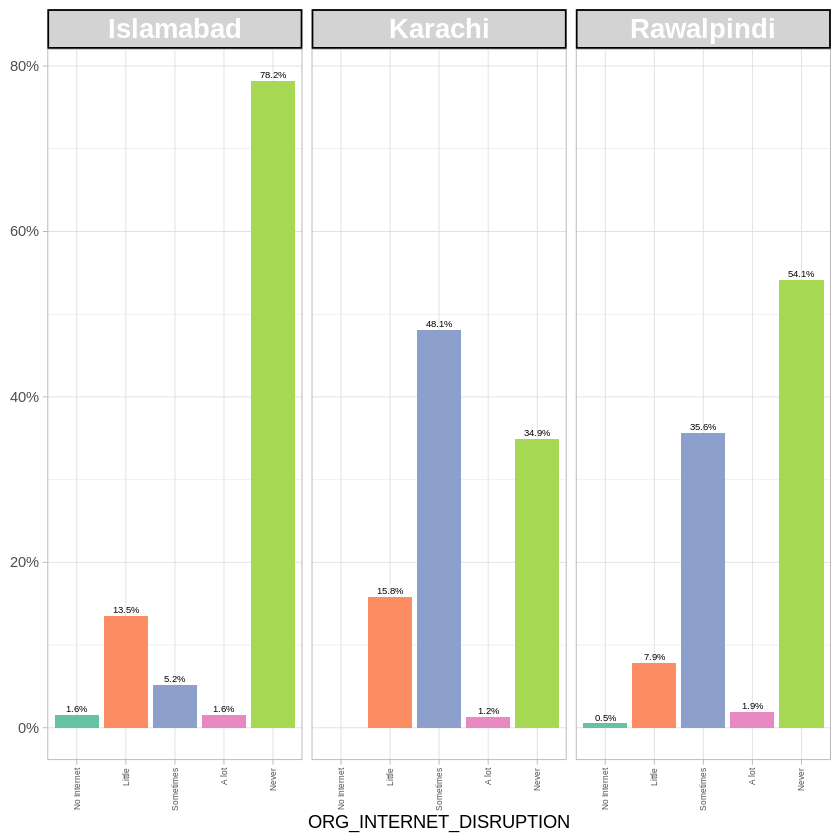

In [ ]:
bar_prop_fun("ORG_INTERNET_DISRUPTION","ORG_CITY")

In [184]:

# Now using MAP, fixing facet variable to ORG_CITY
#uni_plots = map(uni_var, ~bar_fun(.x, "ORG_CITY") )
uni_plots = map(uni_var, ~bar_prop_fun(.x, "ORG_CITY") )

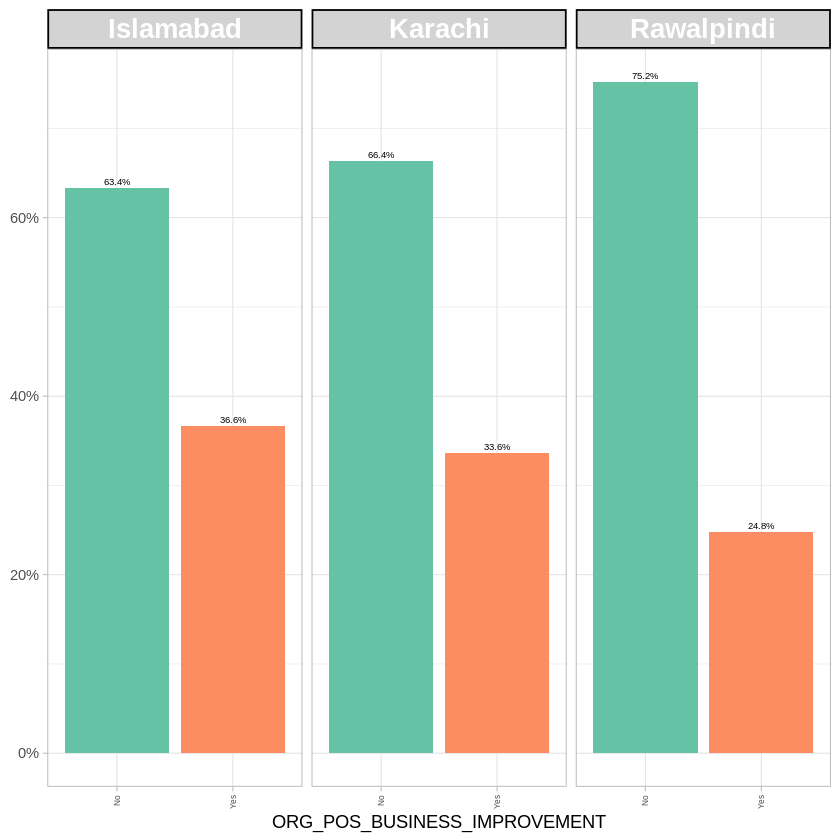

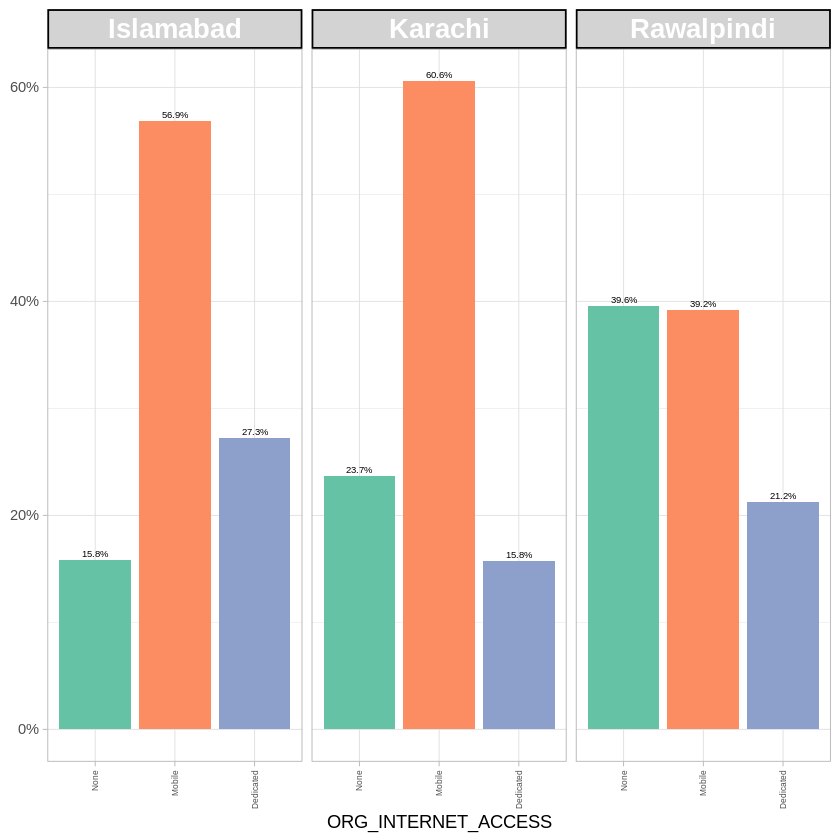

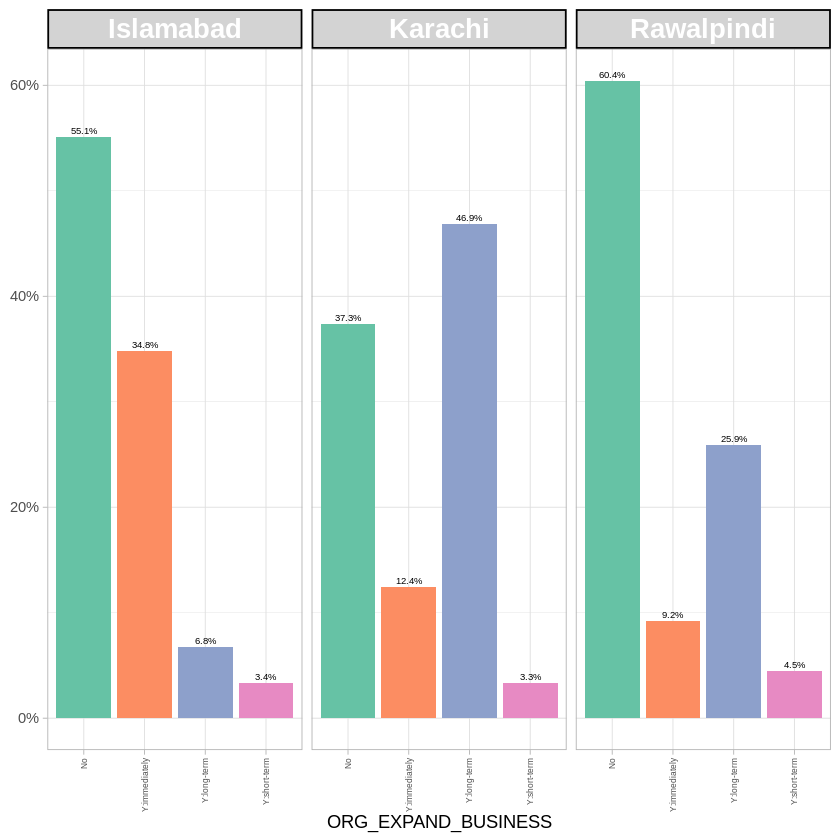

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


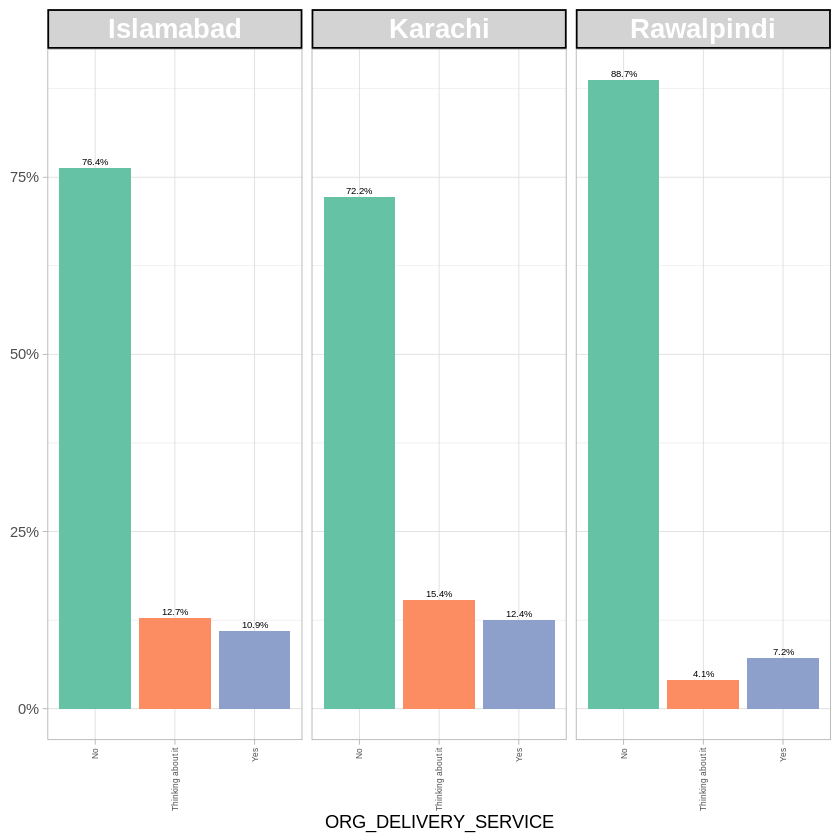

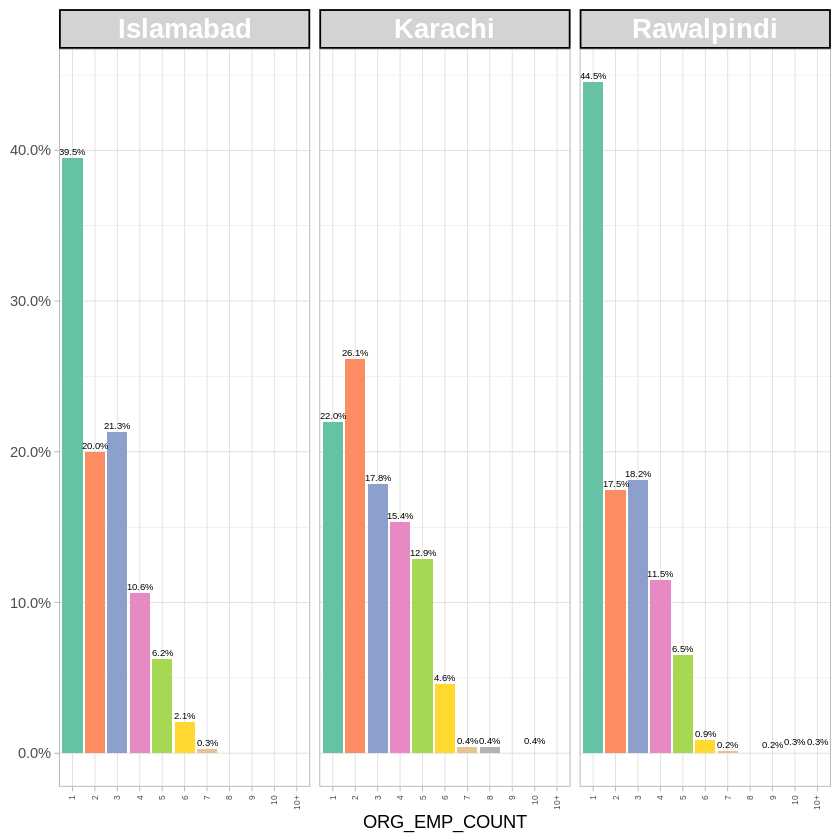

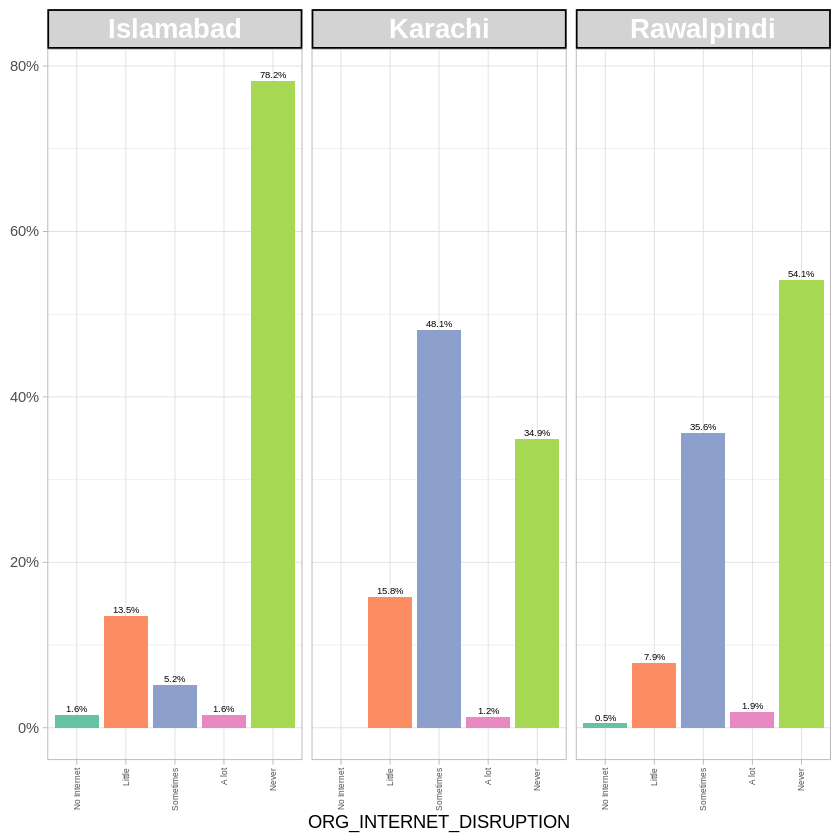

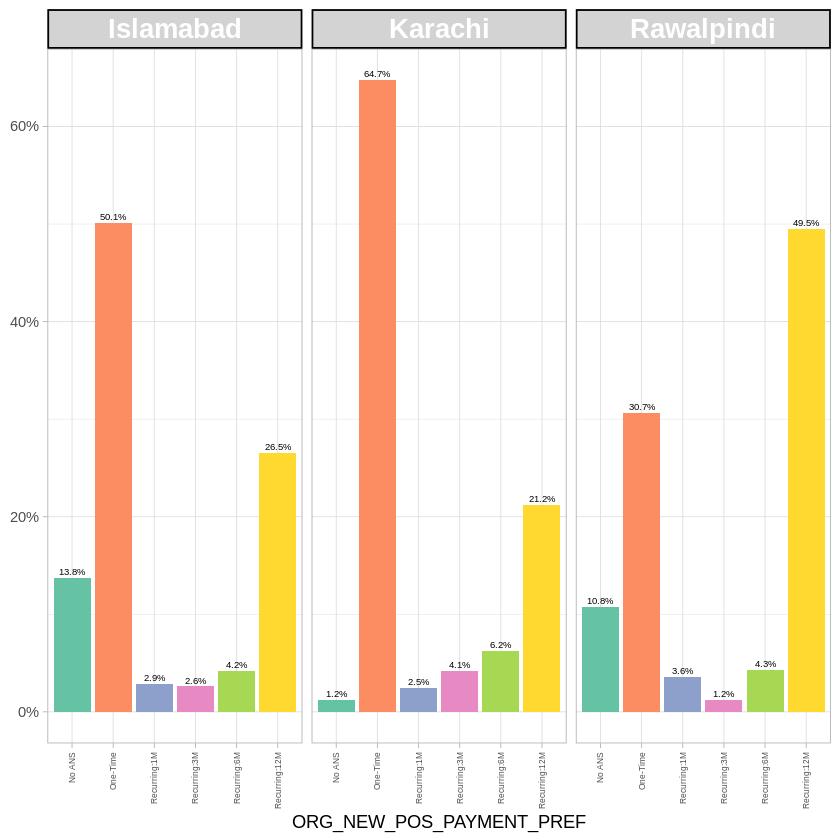

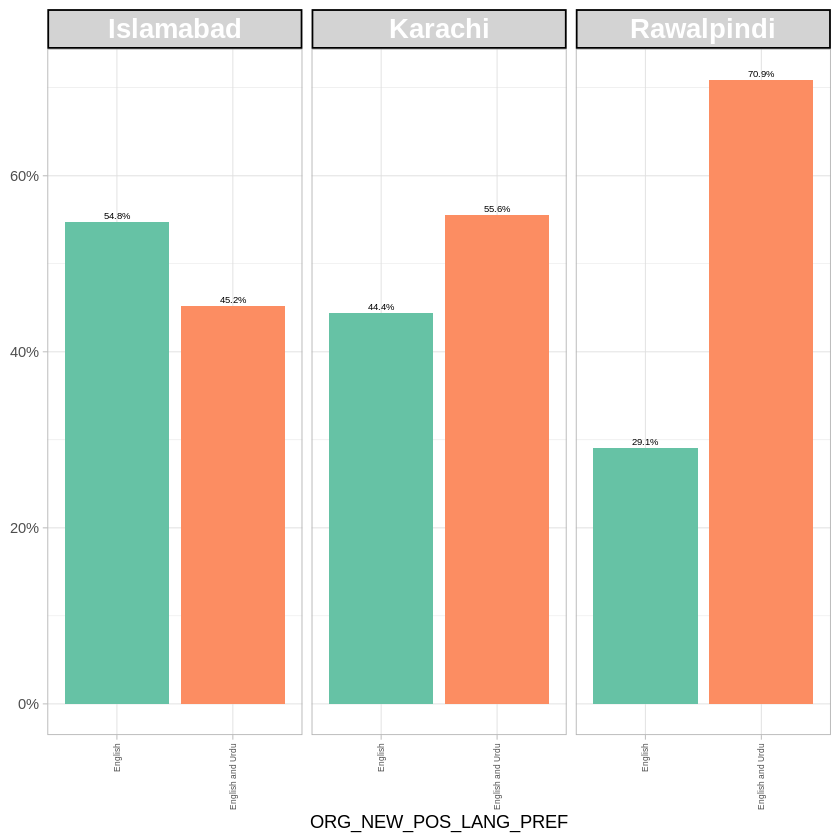

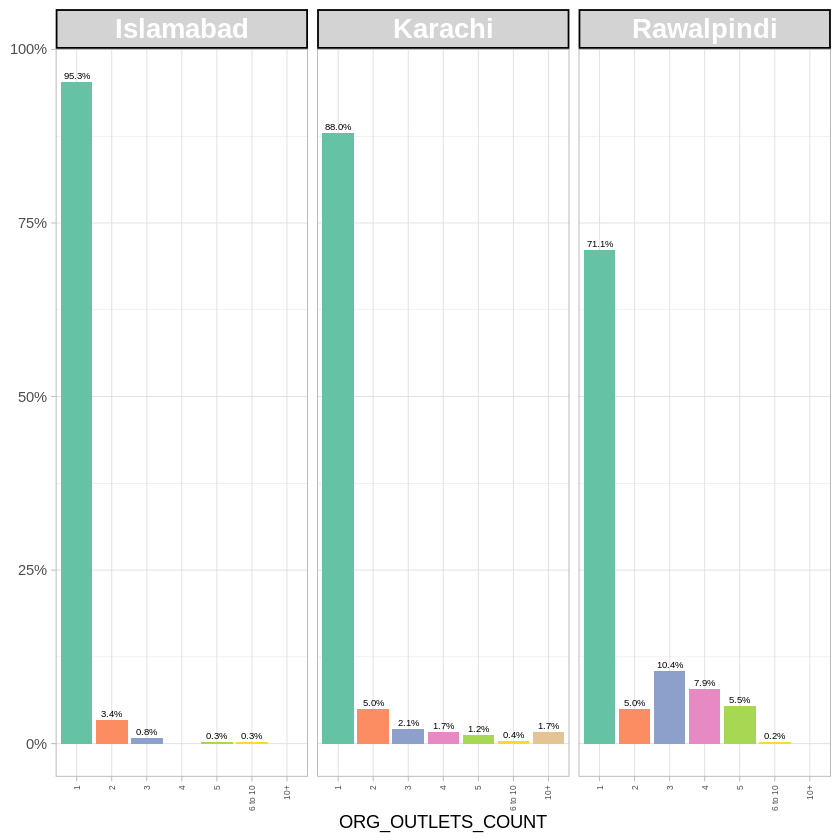

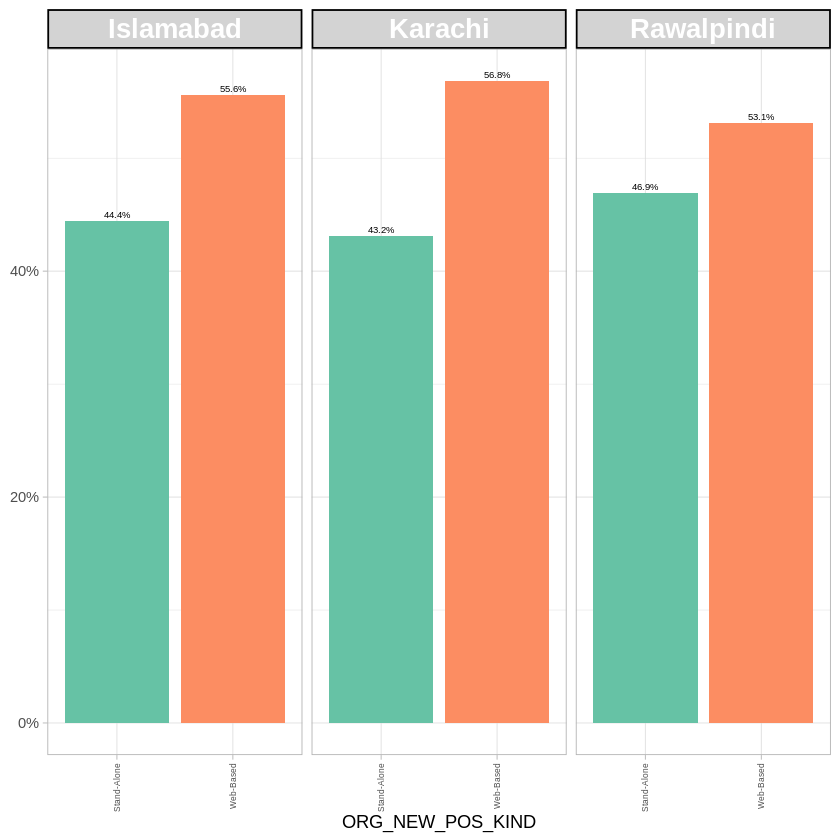

$ORG_POS_BUSINESS_IMPROVEMENT

$ORG_INTERNET_ACCESS

$ORG_EXPAND_BUSINESS

$ORG_DELIVERY_SERVICE

$ORG_EMP_COUNT

$ORG_INTERNET_DISRUPTION

$ORG_NEW_POS_PAYMENT_PREF

$ORG_NEW_POS_LANG_PREF

$ORG_OUTLETS_COUNT

$ORG_NEW_POS_KIND

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT


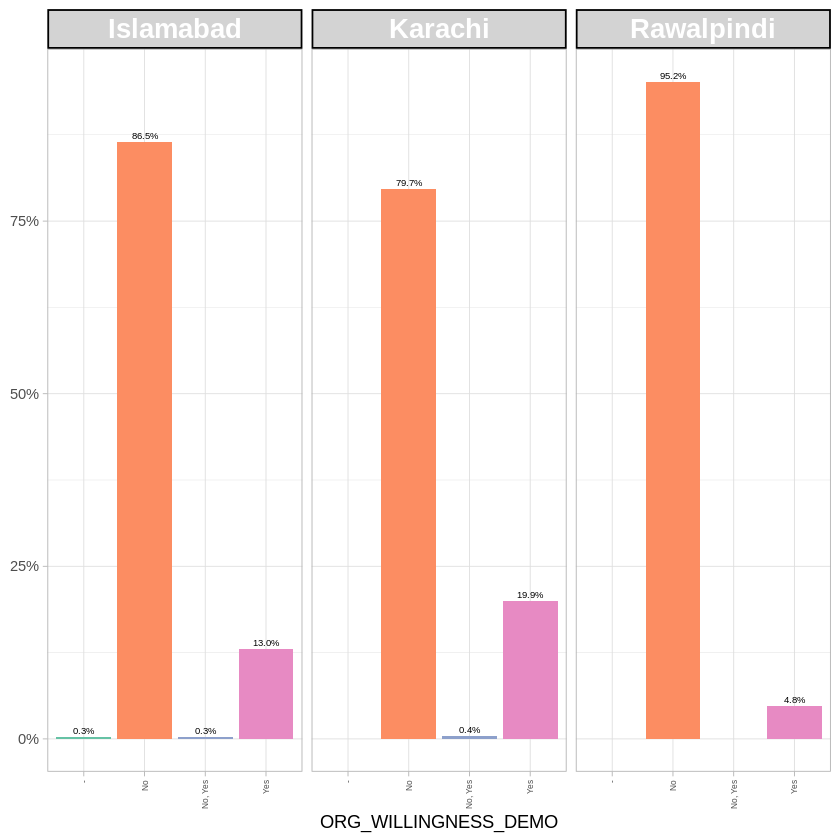

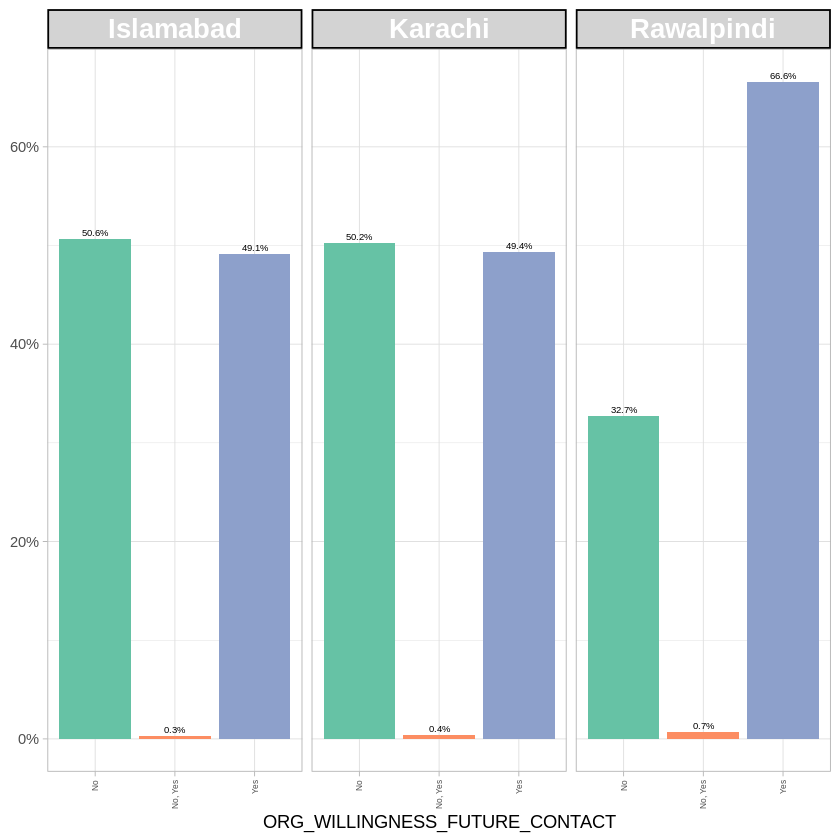

In [185]:
uni_plots

In [ ]:
# SB_REGION should be plotted, without facetting
#'SB_REGION'

In [186]:
# printing the plots
st=format(Sys.time(), "%Y-%m-%d_%H:%M")
survey_plot_file = paste ("Plots_", "WithPOS_",st, ".pdf", sep="")
#pdf("Analysis_WithPOS_v6.pdf")
pdf(survey_plot_file)
uni_plots
dev.off()

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


$ORG_POS_BUSINESS_IMPROVEMENT

$ORG_INTERNET_ACCESS

$ORG_EXPAND_BUSINESS

$ORG_DELIVERY_SERVICE

$ORG_EMP_COUNT

$ORG_INTERNET_DISRUPTION

$ORG_NEW_POS_PAYMENT_PREF

$ORG_NEW_POS_LANG_PREF

$ORG_OUTLETS_COUNT

$ORG_NEW_POS_KIND

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT


png 
  2

# Dumping Data for Further Analysis

In [187]:
#st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
st=format(Sys.time(), "%Y-%m-%d_%H:%M")
survey_data_file = paste ("SurveyData-", "withPOS-",st, ".xlsx", sep="")
print(survey_data_file)

[1] "SurveyData-withPOS-2021-05-18_03:26.xlsx"


In [192]:
#detach("package:openxlsx", unload=TRUE)

#install.packages("openxlsx")

#library(openxlsx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘openxlsx’


The following objects are masked from ‘package:xlsx’:

    createWorkbook, loadWorkbook, read.xlsx, saveWorkbook, write.xlsx




In [193]:
## Create a new workbook
wb <- createWorkbook()
## Add 1 worksheets
addWorksheet(wb, "All POS Survey")
writeData(wb, "All POS Survey", df_with_2)
#saveWorkbook(wb, "SurveyData-20201028-North.xlsx", overwrite = TRUE)
saveWorkbook(wb, survey_data_file, overwrite = TRUE)

# Summary
 The above analysis is for 'With POS'

 It excludes uni-var analysis for certain variables - (multiple choice options):

1.   ORG_TYPE
2.   ORG_DISCOUNTS_OFFERED
3.   ORG_CUSTOMER_DATA
4.   ORG_POS_FEATURES
5.   ORG_OLD_POS_PAYMENT_OPTIONS
6.   ORG_OLD_POS_DEVICES
7.   ORG_OLD_POS_URDU_FEATURES
8.   ORG_REASON_TO_REPLACE_POS
9.   ORG_WILLINGNESS_TO_PAY_AMOUNT
10.   ORG_OLD_POS_PROVIDER_PAYMENT_METHOD




## ToDO

Fix uni-var analysis

